# Predicting handwritten digits using ANN

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#importing data set from keras library
(train_X,train_y),(test_X,test_y)=keras.datasets.mnist.load_data()

In [3]:
print("Training set lenght:",len(train_X))
print("Training set lenght:",len(test_X))

Training set lenght: 60000
Training set lenght: 10000


This data set has 60 000 images in training set and 10 000 images in test set.

In [4]:
#Shape of images
train_X[0].shape

(28, 28)

In [5]:
train_X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

We have two dimensional images (28x28). The numbers from 0 to 255 represents colors.

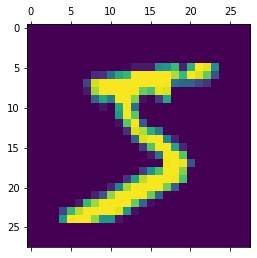

In [6]:
#Plotting first image
plt.matshow(train_X[0])

In [7]:
#Plotting target value of first image
train_y[0]

5

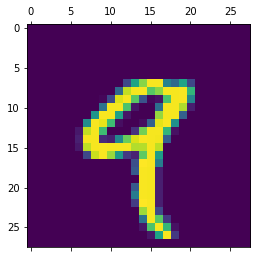

In [8]:
#Plotting fifth image
plt.matshow(train_X[4])

In [9]:
#Plotting target value of fifth image
train_y[4]

9

In [10]:
train_y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

We can see that we have 0-10 values in target variable.

In [11]:
#images shape
train_X.shape

(60000, 28, 28)

### Scaling and reshaping images

Before we move on we need to scale our data set and reshape  into one dimensional. 

In [12]:
# Scaling
train_X=train_X/255
test_X=test_X/255

In [13]:
train_X[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

We divide our training and test labels with 255 because maximum value in those sets is 255 and after dividing we got values between 0 and 1.

In [14]:
# Reshaping (flattening) images (60000,784)
flatten_X=train_X.reshape(len(train_X),28*28)
flatten_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
# Reshaping (flattening) images (60000,784)
flatten_train_X=train_X.reshape(len(train_X),28*28)
flatten_train_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
flatten_train_X.shape

(60000, 784)

In [17]:
# Reshaping (flattening) images (60000,784)
flatten_test_X=test_X.reshape(len(test_X),28*28)
flatten_test_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
flatten_test_X.shape

(10000, 784)

In [19]:
#First image after reshaping
flatten_train_X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Preparing model

In [ ]:
#Making model
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid") 
    ])
# 10 neurons output layer from 0-9 and input layer is 784 neurons

In [ ]:
#Compile model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy", #computes the crossentropy loss between the labels and prediction(categorical output 0-1)
    metrics=["accuracy"]
    ) 

In [20]:
#Fitting model
model.fit(flatten_train_X,train_y,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4866 - accuracy: 0.8800
Epoch 2/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3065 - accuracy: 0.9158
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2852 - accuracy: 0.9216
Epoch 4/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2746 - accuracy: 0.9243
Epoch 5/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2678 - accuracy: 0.9262
Epoch 6/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2628 - accuracy: 0.9273
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2585 - accuracy: 0.9285
Epoch 8/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2551 - accuracy: 0.9303
Epoch 9/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2523 - accuracy: 0.9307
Epoch 10/15
1875/1875 [==============================] - 13s 7ms/step - lo

In [21]:
#Evaluating model
model.evaluate(flatten_test_X,test_y)

313/313 [==============================] - 2s 5ms/step - loss: 0.2593 - accuracy: 0.9286


[0.2592868506908417, 0.928600013256073]

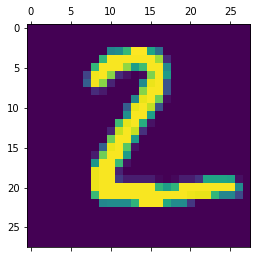

In [22]:
#plotting second image
plt.matshow(test_X[1])

In [23]:
#Predicting values
predicted=model.predict(flatten_test_X)

In [24]:
# Second predicted value
second_image=predicted[1]
second_image

array([8.1835373e-05, 8.0100904e-07, 5.3198481e-01, 1.3549450e-05,
       6.8657354e-17, 2.7405024e-03, 2.7015507e-03, 8.8291465e-23,
       1.5965550e-05, 3.0815973e-19], dtype=float32)

In [25]:
#Printing maximum value of second image
np.argmax(second_image)

2

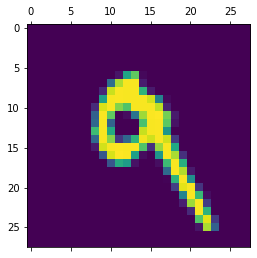

In [26]:
#plotting  image number 8
plt.matshow(test_X[7])

In [27]:
# Predicting image number 8
eight_image=predicted[7]
eight_image

array([2.6487526e-11, 1.0875463e-03, 3.3047600e-06, 2.1842994e-05,
       3.0219555e-04, 5.6314468e-04, 4.1005890e-08, 1.6274962e-05,
       5.9783604e-05, 8.6371660e-02], dtype=float32)

In [28]:
#Printing maximum value of second image
np.argmax(eight_image)

9

We can see that our model predicted well the numbers are 2 and 9.

### Confusion matrix 

In [29]:
# Converting predicting values into whole numbers
predicted_labels=[np.argmax(i) for i in predicted]
predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [30]:
#Making confusion matrix
c_matrix=tf.math.confusion_matrix(labels=test_y,predictions=predicted_labels)
c_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    7,    7,    2,    1,    0],
       [   0, 1115,    3,    3,    0,    1,    3,    2,    8,    0],
       [   4,    9,  920,   15,    6,    6,   16,   10,   43,    3],
       [   3,    0,   15,  921,    0,   25,    2,   12,   27,    5],
       [   1,    1,    4,    2,  917,    0,    8,    5,   12,   32],
       [   9,    2,    1,   28,    8,  789,   14,    7,   31,    3],
       [  12,    3,    3,    2,    7,   14,  914,    1,    2,    0],
       [   1,    7,   21,    7,    7,    2,    0,  951,    4,   28],
       [   4,    8,    5,   20,    8,   26,    9,    8,  880,    6],
       [   9,    8,    1,    8,   22,    7,    0,   23,   12,  919]],
      dtype=int32)>

Text(69.0, 0.5, 'True')

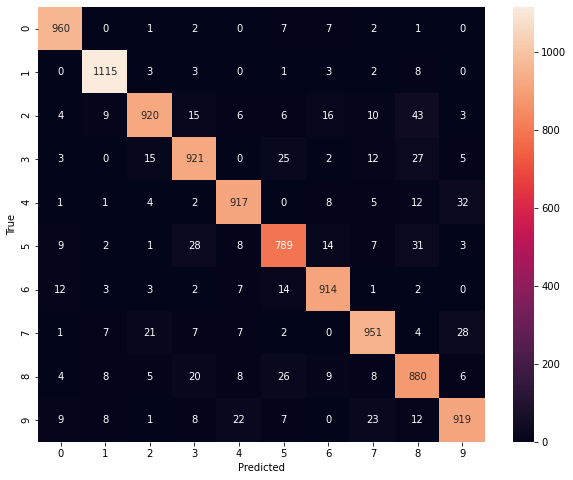

In [31]:
import seaborn as sns
#Plotting confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(c_matrix,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")          

The values in diagonal represent number of times certain value has been predicted good. For example value 0 has been 967 times predicted good. Other values represent how many times was not predicted good and with what value did our model replace it. For example number 5 has been 45 times replaces by number 3 by our model. 

### Hidden layer

In [32]:
model_2=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="relu"), #hidden layer input (100)
    keras.layers.Dense(10,activation="sigmoid")
])

model_2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
    ) 

model_2.fit(flatten_train_X,train_y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2891 - accuracy: 0.9197
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1362 - accuracy: 0.9607
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0985 - accuracy: 0.9709
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0773 - accuracy: 0.9771
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0605 - accuracy: 0.9813
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0504 - accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0422 - accuracy: 0.9870
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0347 - accuracy: 0.9898
Epoch 9/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0287 - accuracy: 0.9911
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/ste

In [44]:
#Evaluating model
model_2.evaluate(flatten_test_X,test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.0867 - accuracy: 0.9745


[0.08671094477176666, 0.9745000004768372]

As we can see we improved accuracy of our model by adding just one hidden layer.

In [48]:
#Predicting values with second model
predicted_2=model_2.predict(flatten_test_X)

In [49]:
# Converting predicting values into whole numbers
predicted_labels_2=[np.argmax(i) for i in predicted_2]
predicted_labels_2[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [50]:
#Making confusion matrix
c_matrix_2=tf.math.confusion_matrix(labels=test_y,predictions=predicted_labels_2)
c_matrix_2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    0,    0,    1,    0,    2,    0,    3,    1],
       [   0, 1118,    3,    1,    0,    0,    2,    1,    9,    1],
       [   4,    1, 1015,    1,    2,    0,    1,    3,    5,    0],
       [   0,    0,    6,  988,    1,    7,    0,    2,    3,    3],
       [   1,    0,    5,    1,  954,    0,    2,    0,    2,   17],
       [   2,    0,    0,   11,    2,  863,    2,    2,    6,    4],
       [   6,    3,    4,    1,    6,    7,  925,    0,    5,    1],
       [   1,    7,   12,    6,    4,    1,    0,  969,    9,   19],
       [   7,    1,    6,    4,    4,    2,    1,    0,  945,    4],
       [   2,    2,    0,    1,    3,    3,    0,    1,    2,  995]],
      dtype=int32)>

Text(69.0, 0.5, 'True')

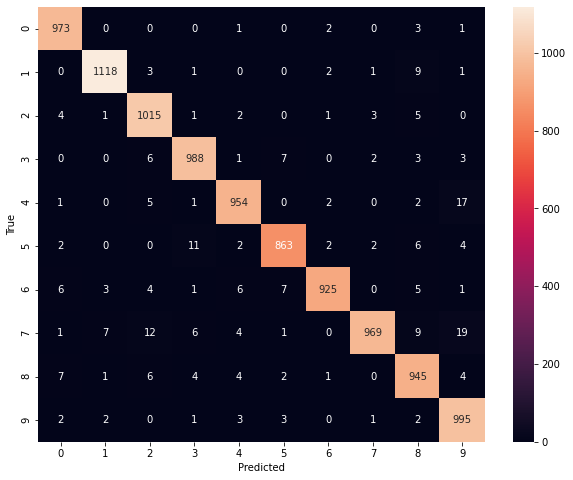

In [51]:
import seaborn as sns
#Plotting confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(c_matrix_2,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True") 

We can clearly see that we have less errors with second model which has one hidden layer.

### Flatten value direct in model

In [55]:
model_3=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input shape dimension of image
    keras.layers.Dense(100,activation="relu"), 
    keras.layers.Dense(10,activation="sigmoid")
])

model_3.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
    ) 

model_3.fit(train_X,train_y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2867 - accuracy: 0.9199
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1318 - accuracy: 0.9617
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0961 - accuracy: 0.9719
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0757 - accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0610 - accuracy: 0.9816
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0499 - accuracy: 0.9851
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0427 - accuracy: 0.9866
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0353 - accuracy: 0.9891
Epoch 9/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0299 - accuracy: 0.9910
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step

# Results


|    Model           | Accuracy_score | 
|--------------------|----------------|
|No hidden layer     |     92.86 %    | 
|                    |                |                                  
|One hidden layer    |     98.45 %    |  

     
